# plotting tools
This tutorial shows you how to plot CASPAR parameters using the plotting toolkit.  

## Initialize casparing

Import the required modules

In [1]:
import casparing.plot.CASPAR_sortdata as csort
import casparing.plot.CASPAR_plot_MdotAge as mdotage
import casparing.plot.CASPAR_plot_MMdotbyDiagnostic as mdiag
import casparing.plot.CASPAR_plot_MMdot as mmdot

%load_ext autoreload
%autoreload 2

## load data 
load the CASPAR and literature database. If you already have the database downloaded, you can load it in as below.  Otherwise, you can download it by calling:
```
df_lit, df_caspar = csort.CASPAR_loaddata()
```

In [3]:
lit_database = '../../../Comprehensive Archive of Substellar and Planetary Accretion Rates (CASPAR) Betti+2023 - Literature Database.csv'
caspar = '../../../Comprehensive Archive of Substellar and Planetary Accretion Rates (CASPAR) Betti+2023 - CASPAR.csv'
df_lit, df_caspar = csort.CASPAR_loaddata(lit_database=lit_database, caspar=caspar) 


/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


If you would like to split the data further, there are three sorting functions:

1. separate by mass.  This function allows you to separate the dataframe into stars, brown dwarfs, and planetary mass companions based on mass.  Additionally, you can get the same dataframes split based on accretion rate detections and upper limits.  

In [4]:
stars, bds, planets, [Sreg, Supp], [BDreg, BDupp], [Preg, Pupp]  = csort.CASPAR_separateByMass(df_caspar)

2. separate by upper limit.  This function allows you to separate the dataframe into detections and upper limits based on the final accretion rate.

In [5]:
REG, UPP = csort.CASPAR_separateByUppLimit(df_caspar)

3. separate by age. This function allows you to separate the dataframe based on the age of the objects. You must provide the age range in Myr.

In [6]:
df_age = csort.CASPAR_separateByAge(df_caspar, agelow=0, ageupp=3)

# plot data
After the data is loaded, you can use any of the plotting tools. The main plotting modules are found in :

- ```CASPAR_allskymap.allsky(df_caspar, akari_file, **kwargs)```
-  ```CASPAR.cornerplot.corner_map(df_caspar, fs=20)``` NOTE: still under development
-  ```CASPAR.Haprofile.Haprofile(df_lit, df_caspar, **kwargs)```
- ```CASPAR_plot_MdotAge.MdotVSage(df_caspar, colorby='mass', scaleByMass=True, fit_data=True, **kwargs)```
-  ```CASPAR_plot_MdotAge.MMdotVSage(df_caspar, fit_mass_regions=True, group=True)```
- ```CASPAR_plot_MdotAge.plot_MMdotVSage(df_caspar, group=True, fit_mass_regions=True, plot_residuals=True, plot_pdf=True, **kwargs)```
- ```CASPAR_plot_MdotAge.interceptVSAge(df_caspar, fit_mass_regions=True, **kwargs)```
- ```CASPAR_plot_MdotAge.BDMdotvsAgeInteractionModel(df_caspar, **kwargs)```
- ```CASPAR_plot_MdotAge.BDMdotvsAgeInteractionModelRES(df_caspar, **kwargs)```
- ```CASPAR_plot_MMdot.MdotVSmass(df_caspar, colorby='object', fit_data=True, **kwargs)```
- ```CASPAR_plot_MMdot.MdotVSmass_residuals(df_caspar,**kwargs)```
- ```CASPAR_plot_MMdotbyDiagnostic.MdotbyDiagnostic(df_caspar, cols=3,fit_data=True, fig=None, ax=None,title=True, **kwargs)```
- ```CASPAR_plot_MMdotbyDiagnostic.MdotVsAccDiagresiduals(df_caspar, **kwargs)```
- ```CASPAR_plot_MMdotbyDiagnostic.MdotVsAccDiagAll(df_caspar,  fig=None, ax=None,**kwargs)```
- ```CASPAR_plot_MMdotbyDiagnostic.Ha10VSFlux(df_caspar, **kwargs)```
- ```CASPAR_plot_MMdotbyDiagnostic.Ha10VSexcess(df_caspar, **kwargs)```
- ```CASPAR_plot_MMdotbyDiagnostic.MdotbyNIRLineDiagnostic(df_caspar, fit_data=True, **kwargs)```
- ```CASPAR_plot_MMdotbyDiagnostic.Ha10_UVexcess_combo(df_caspar, **kwargs)```
- ```CASPAR_plot_MMdotbySFR.MdotVSmassVSsfr(df_caspar, lit_lines=True, **kwargs)```
- ```CASPAR_plot_physicalParamComparison.refVSnew(df_lit, df_caspar, **kwargs)```
-  ```CASPAR_plot_physicalParamComparison.refVSnew_single(df_lit, df_caspar, phyParam, **kwargs)```
- ```CASPAR_plot_physicalParamComparison.refVSnew_mdotresidual(df_lit, df_caspar, **kwargs)```
- ```CASPAR_plot_variability.plot_allvariability(df_caspar, **kwargs)```

Below, we show some examples. 

CASPAR
CASPAR stars
stars fitting information
# 764.0 slope:  2.1715174 0.109969996 0.11 intercept:  -7.9732647 0.055329327 0.05 stdfit:  0.741515 R2:  0.63525033
BDs fitting information
# 236.0 slope:  3.1941512 0.58507675 0.57 intercept:  -6.5434165 0.8135345 0.78 stdfit:  1.3624848 R2:  0.3947168
PMCs fitting information
# 38.0 slope:  0.24882099 2.90574145 3.0 intercept:  -10.657663 5.64464521 5.77 stdfit:  0.80757499 R2:  0.03592068


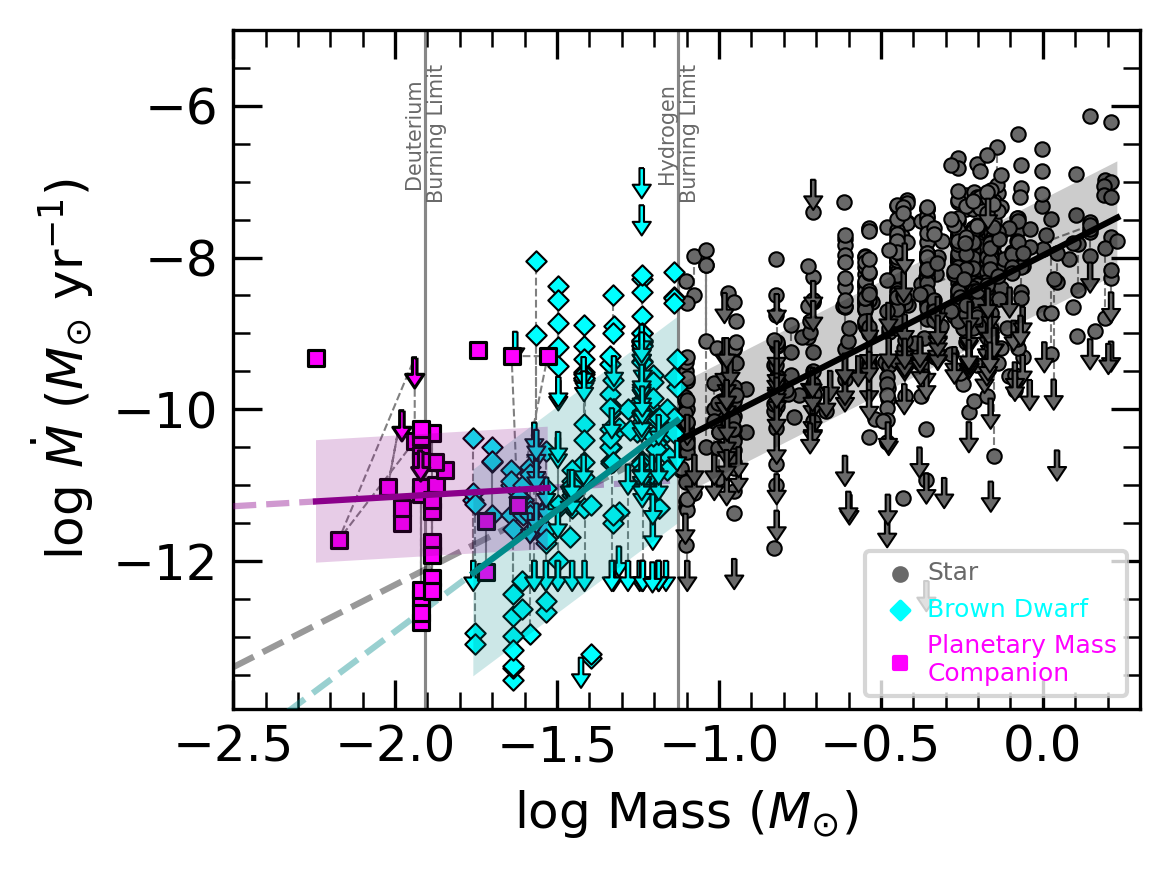

In [7]:

mmdot.MdotVSmass(df_caspar, colorby='object', fit_data=True, fitname='CASPAR', fit_mass_regions=True,
                mainlegend=True, mainlegendloc='lower right', s=12, fs=12, )


std log age =  0.396 yr 
max log Mdot =  -4.633 Msun/yr
best fit parameters
N = 1038.0, std= 0.777, R2 = -0.315
slope = -0.859_0.0943^0.0934, intercept = -2.81_0.604^0.601


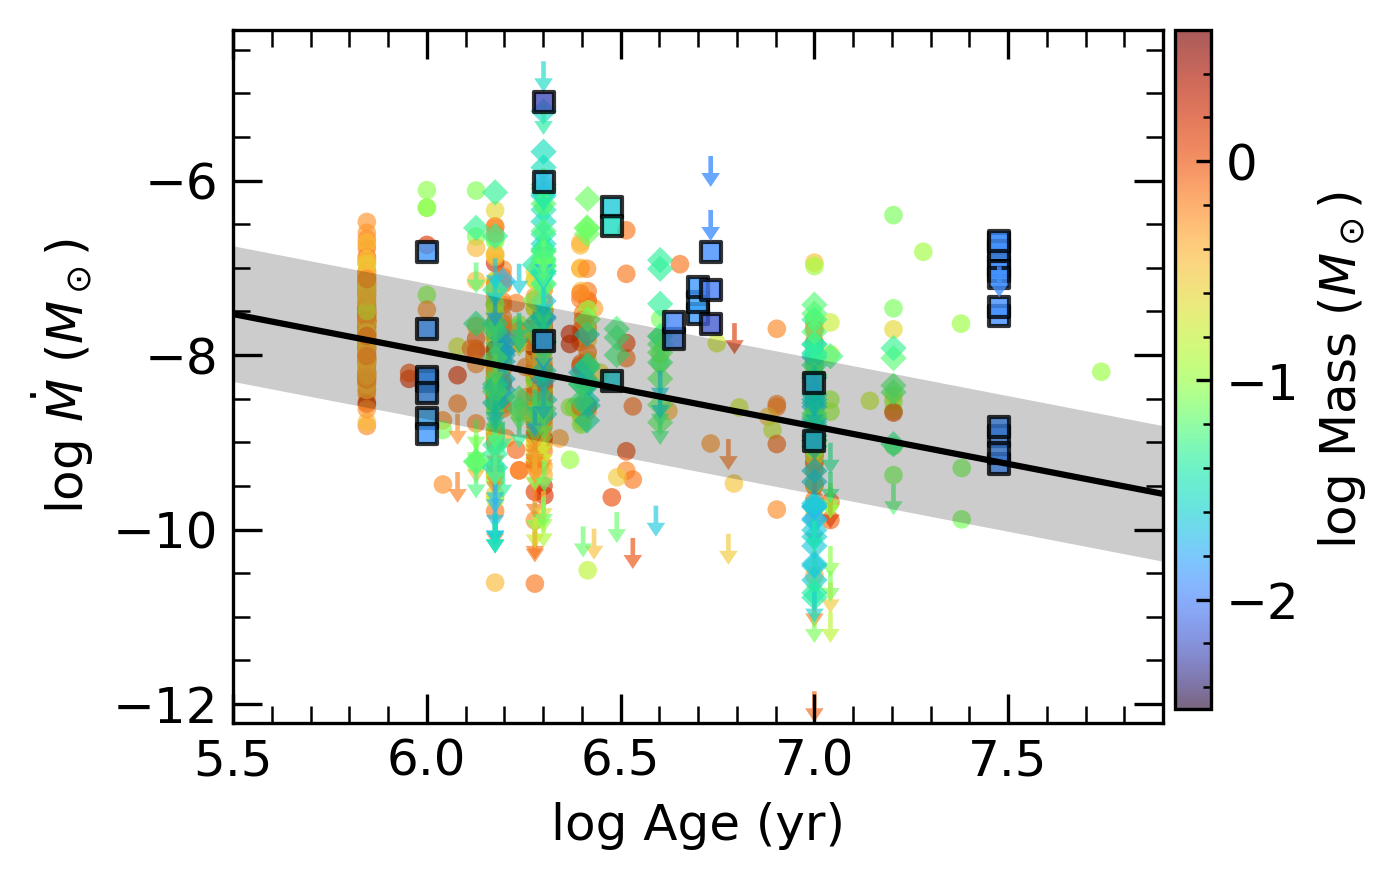

In [8]:
mdotage.MdotVSage(df_caspar, colorby='mass', scaleByMass=True, fit_data=True, fitname='CASPAR')

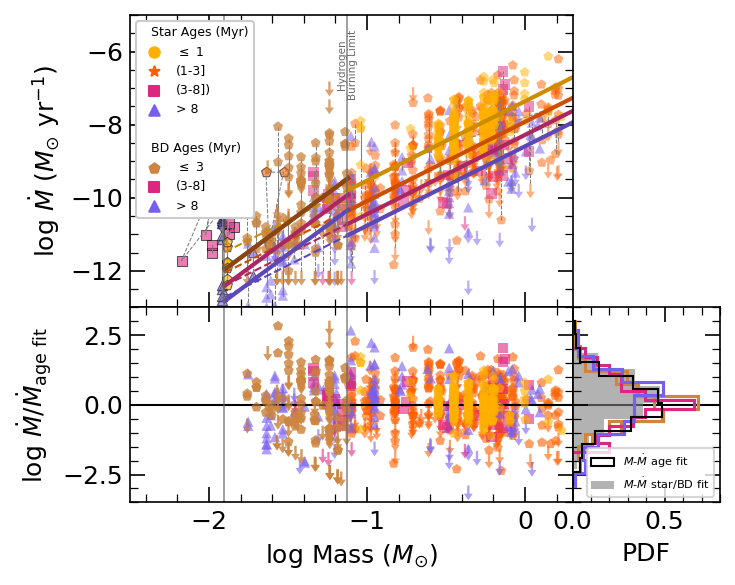

In [9]:
fig, (ax, axN, axP) = mdotage.plot_MMdotVSage(df_caspar, group=True, fit_mass_regions=True, plot_residuals=True, plot_pdf=True)


Continuum Excess
o
Y [-10.94533432 -11.28186898 -10.2253173   -9.83958387  -9.18455067
  -8.58395444  -8.29466763]
Hα Photometric Luminosity
o
Y [-10.52136401 -10.24074303          nan  -8.30980392  -8.4527409
  -8.03948092  -7.59736242]
Line Luminosity
o
Y [-11.31544052 -10.62765013  -9.69072508  -9.75888687  -8.78639752
  -8.38755733  -8.09406858]
Line Profile
o
Y [-11.21509029 -11.50809991 -10.96808873  -9.68223851  -9.
  -9.91224409  -9.21694636]


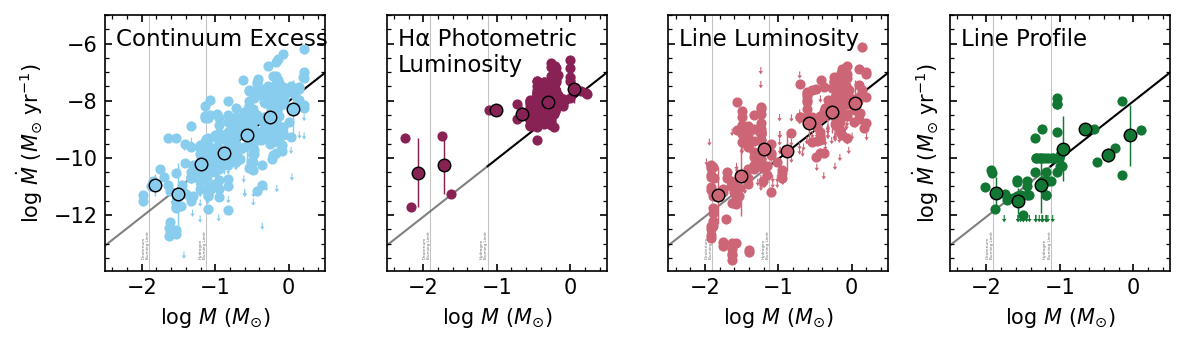

In [10]:
mdiag.MdotbyDiagnostic(df_caspar, cols=3,fit_data=True, title=True)